In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [4]:
import io
import pandas as pd
import numpy as np

In [5]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv'])).fillna(0)

In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [9]:
df = train.loc[(train.Store == 1) & (train.Dept == 1),['Date','Weekly_Sales']]

In [10]:
df.head()

,Date,Weekly_Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


In [11]:
df.set_index('Date', inplace=True)

In [12]:
df.head()

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90


In [13]:
df.index

Index(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05',
       '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02', '2010-04-09',
       ...
       '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14', '2012-09-21',
       '2012-09-28', '2012-10-05', '2012-10-12', '2012-10-19', '2012-10-26'],
      dtype='object', name='Date', length=143)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2+ KB


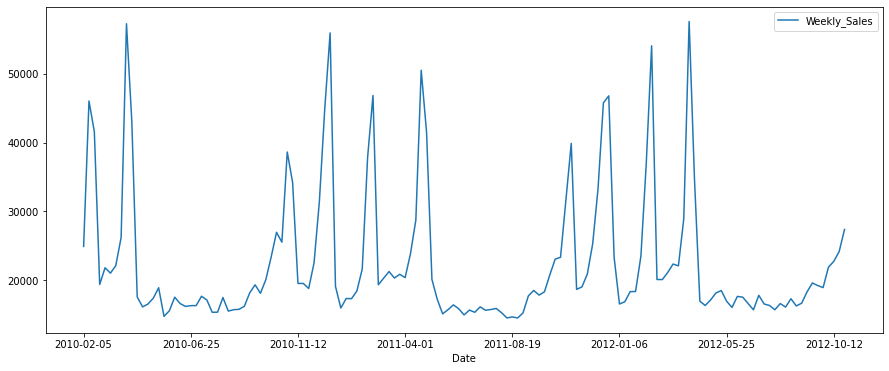

In [15]:
df.plot(figsize=(15, 6))

In [16]:
df.index = pd.to_datetime(df.index)

In [17]:
df.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

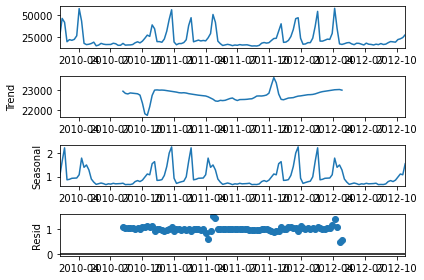

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
fig = result.plot()

In [114]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 4.3 MB/s 
     |████████████████████████████████| 9.5 MB 26.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [35]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df, start_p=1, d=1, start_q=1,
                           max_p=4, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2840.830, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2804.538, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2785.696, Time=0.19 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2840.080, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2787.351, Time=0.28 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2787.311, Time=0.62 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2804.768, Time=0.16 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.70 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=2748.743, Time=1.04 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=2749.6

In [36]:
train = df.loc[:'2012-05-01']
test = df.loc['2012-05-01':]
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [37]:
future_forecast = stepwise_model.predict(n_periods=len(test))

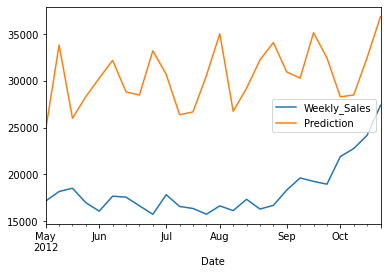

In [38]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

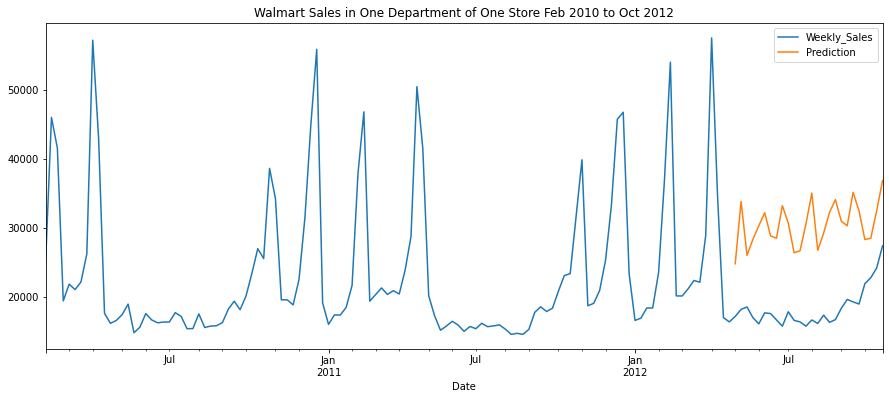

In [39]:
pd.concat([df,future_forecast],axis=1).plot(figsize=(15, 6),
                                             title="Walmart Sales in One Department of One Store Feb 2010 to Oct 2012")